# Project 3rd Hass Avacado

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy 
from scipy.stats import zscore
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("avacado.csv",parse_dates=["Date"])
df2=df.copy()

In [ ]:
df.head(20)

In [ ]:
df.tail(20)

In [ ]:
df.columns

In [ ]:
df.dtypes

In [ ]:
df.shape

In [ ]:
#data doesn't have any null values
df.isnull().sum()


In [ ]:
sns.heatmap(df.isnull())
plt.show()

In [ ]:
df.corr()

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
#from dates we can get monthly yearly and daily analysis and the impact of these variable on Acverage price
df_dates=pd.DataFrame()
df_dates["Month"]=df["Date"].dt.month_name()
df_dates["Day"]=df["Date"].dt.day_name()
df_dates["Year"]=df["Date"].dt.year
df_dates["Avg_price"]=df["AveragePrice"]
df_dates["region"]=df["region"]

df_dates

In [ ]:
#checking the avg price b/w two years
sns.barplot(x="Year",y="Avg_price",data=df_dates)



In [ ]:
plt.figure(figsize=(16,10))
sns.barplot(x="Month",y="Avg_price",data=df_dates)
plt.show()

In [ ]:
#avg prices of the avacados are highest on sat and 2nd highest saturday
sns.barplot(x="Day",y="Avg_price",data=df_dates)

In [ ]:
#the relationship show the relation bw volume and the average price ,it represent that while the volume is low the average price is lower
sns.lineplot(x="Total Volume",y="AveragePrice",data=df)
plt.show()

In [ ]:
#following represent the contrast of the avg prices in different region from year 2015 to 2016
plt.figure(figsize=(16,10))
sns.barplot(x="region",y="Avg_price",data=df_dates)
plt.show()

In [ ]:
df2.describe()

In [ ]:
#checking the distrbution of the data by  univariate plotting
df.hist(figsize=(16,10),bins=15)
#except the average price all the data are skewd

In [ ]:
df.skew()

In [ ]:
df2

In [ ]:
df2.drop("index_by_region",axis="columns", inplace=True)
df2.drop("type",axis="columns", inplace=True)

In [ ]:
df2

In [ ]:
df2["XLarge Bags"]=df2["XLarge Bags"].replace(0,np.nan)
df2["4770"]=df2["4770"].replace(0,np.nan)
df2["Large Bags"]=df2["Large Bags"].replace(0,np.nan)

In [ ]:
df2.isnull().sum()

In [ ]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="mean")
list1=["XLarge Bags","Large Bags","4770"]
for i in list1:
     df2[i]=imp.fit_transform(df2[i].values.reshape(-1,1))

In [ ]:
df2.isnull().sum()

In [ ]:
df2

In [ ]:
df2.columns

In [ ]:
col_list=['AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

for col in col_list :
    if df2[col].skew()>0.55:
        df2[col]=np.log1p(df2[col])

In [ ]:
df2.skew()

In [ ]:
df2.hist(figsize=(16,10),bins=15)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df2["region"] = le.fit_transform(df2["region"])

In [ ]:
df2

In [ ]:
#it will show the outliers 
df2.plot(kind="box",subplots=True,layout=(4,5),figsize=(16,10))

In [ ]:
df3=df2.drop("Date",axis="columns")

In [ ]:
import scipy
from scipy.stats import zscore
z_score=abs(zscore(df3))
df3.shape




In [ ]:
z_score

In [ ]:
#removing all the outliers
df_final1=df3.loc[(abs(zscore(df3))<3).all(axis=1)]

In [ ]:
df_final1.shape

In [ ]:
X=df_final1.drop("AveragePrice",axis=1)

In [ ]:
Y=df_final1["AveragePrice"]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.3, random_state=42)
lr=LinearRegression()
lr.fit(X_train,Y_train)
y_pred=lr.predict(X_test)
r2_scr=r2_score(Y_test,y_pred)
r2_scr

In [ ]:
max_r2=0
for rand in range(1,90):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.3, random_state=rand)
    lr=LinearRegression()
    lr.fit(X_train,Y_train)
    y_pred=lr.predict(X_test)
    r2_scr=r2_score(Y_test,y_pred)
    if r2_scr>max_r2:
        max_r2=r2_scr
print("max r2 score",max_r2,"random",rand)
  #the model is might be suffering from the underfitting to improve we will use other models and also use cross validation  

In [ ]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
max_r2_score= 0
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.3, random_state=89)
for md in model:
    md.fit(X_train,Y_train)
    y_pre=md.predict(X_test)
    r2_scr=r2_score(Y_test,y_pre)
    print(r2_scr)
    if r2_scr>max_r2_score:
        max_r2_score=r2_scr
        best_model=md
print()
print()
print()
print("max score ",max_r2_score,"best model is ",best_model) 
    
    

In [ ]:
KN=KNeighborsRegressor()
from sklearn.model_selection import cross_val_score
a_score=cross_val_score(KN,X,Y,cv=10,scoring="r2")

In [ ]:
a_score

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.3, random_state=89)
best_r2=0
for i in range(1,20):
    KN=KNeighborsRegressor(n_neighbors=i)
    KN.fit(X_train,Y_train)
    y_pred=KN.predict(X_test)
    r2_scr=r2_score(Y_test,y_pred)
    if r2_scr>best_r2:
        best_r2=r2_scr
        n_final=i
print()
print()
print()
print("final r2",best_r2,"  ","best n_neighbor",n_final)
print()
print()
    
    


In [ ]:
KN=KNeighborsRegressor(n_neighbors=2)
KN.fit(X_train,Y_train)
y_pred=KN.predict(X_test)
r2_scr=r2_score(Y_test,y_pred)
r2_scr

In [ ]:
print("r2_score",r2_scr)
print("mean absolute error",mean_absolute_error(Y_test,y_pred))
print("mean squared error",mean_squared_error(Y_test,y_pred))

In [ ]:
#from data we can see the linear relation 
plt.scatter(x=Y_test,y=y_pred)
plt.xlabel("Y_test")
plt.ylabel("prediction of y")

# Prediction of the region

In [389]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC

In [390]:
xc=df2.drop(columns=["Date","region"])
yc=df2.region

In [391]:
#using STandardscaler standardizing the value of independent variable
sc=StandardScaler()
xc=sc.fit_transform(xc)


In [397]:
x_train,x_test,y_train,y_test=train_test_split(xc,yc,test_size=0.3,random_state=89,stratify=yc)

In [417]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier()
MNB=MultinomialNB
ABC=AdaBoostClassifier()
GBC=GradientBoostingClassifier()

In [418]:
model1=[]
model1.append(("KNeighborsClassifier",KNN))
model1.append(("SVC",SV))
model1.append(("DecisionTreeClassifier",DT))
model1.append(("logistic regression",LR))
model1.append(("AdaBoostClassifier",ABC))
model1.append(("GradientBoostingClassifier",GBC))

********************* KNeighborsClassifier ************


KNeighborsClassifier()


accuracy scoore =  0.9057017543859649


cross validation scr = 0.893930812129662




classification report               precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.83      0.94      0.88        16
           2       1.00      1.00      1.00        20
           3       0.90      0.95      0.93        20
           4       1.00      0.95      0.97        19
           5       0.88      1.00      0.94        15
           6       0.96      1.00      0.98        23
           7       0.73      0.89      0.80         9
           8       0.88      1.00      0.93         7
           9       1.00      1.00      1.00        14
          10       0.75      0.60      0.67         5
          11       1.00      1.00      1.00         7
          12       0.86      1.00      0.92        12
          13       0.70      1.00      0.82         7

AxesSubplot(0.125,0.808774;0.62x0.0712264)
********************* logistic regression ************


LogisticRegression()


accuracy scoore =  0.868421052631579


cross validation scr = 0.8648614499825724




classification report               precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        20
           3       0.95      0.95      0.95        20
           4       0.90      0.95      0.92        19
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        23
           7       0.80      0.89      0.84         9
           8       1.00      1.00      1.00         7
           9       0.88      1.00      0.93        14
          10       1.00      0.60      0.75         5
          11       1.00      1.00      1.00         7
          12       0.75      1.00      0.86        12
          13 

KeyboardInterrupt: 

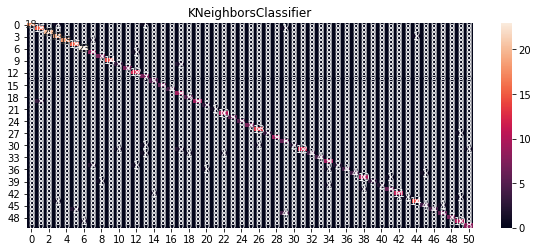

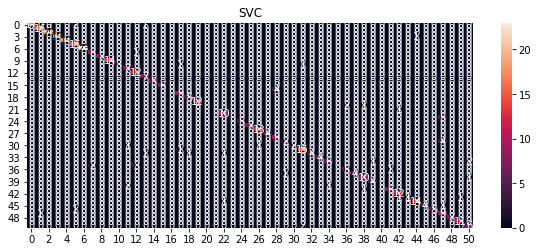

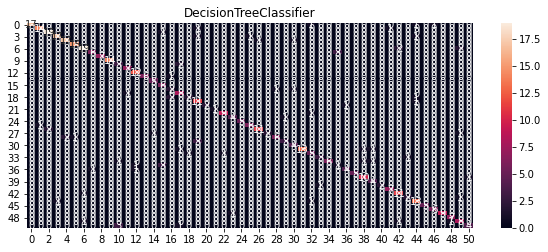

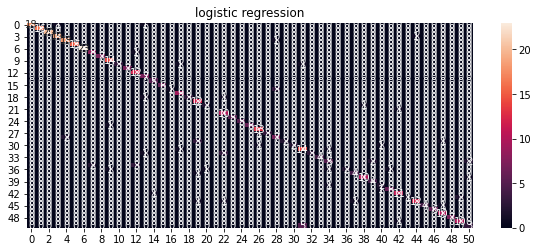

Error in callback <function flush_figures at 0x00000045CAD1BDC0> (for post_execute):


KeyboardInterrupt: 

In [419]:
model2=[]
score=[]
cvs=[]
rocscore=[]
for name,md in model1:
    print("*********************",name,"************")
    print("\n")
    model2.append(name)
    md.fit(x_train,y_train)
    print(md)
    y_pred=md.predict(x_test)
    print("\n")
    AS=accuracy_score(y_test,y_pred)
    score.append(AS*100)
    print("accuracy scoore = ",AS)
    print("\n")
    sc=cross_val_score(md,xc,yc,cv=10,scoring="accuracy").mean()
    print("cross validation scr =", sc)
    cvs.append(sc*100)
    print("\n")
    
    print("\n")
    print("classification report",classification_report(y_test,y_pred))
    print("\n")
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))

In [ ]:
#above all knn is the best model giving highest accuracy

In [415]:

#checking the best parameter for Kneighborsclassifier
x1_train,x1_test,y1_train,y1_test=train_test_split(xc,yc,test_size=0.33,random_state=89)
parameters={"n_neighbors":range(1,10)}
KN=KNeighborsClassifier()
gs=GridSearchCV(KN,parameters)
gs.fit(x1_train,y1_train)
gs.best_params_

{'n_neighbors': 1}

In [422]:
x1_train,x1_test,y1_train,y1_test=train_test_split(xc,yc,test_size=0.33,random_state=89)
KN=KNeighborsClassifier(n_neighbors=1)
KN.fit(x1_train,y1_train)
y1_pred=KN.predict(x1_test)
accr_scr=accuracy_score(y1_test,y1_pred)
print("accuracy score :",accr_scr)

accuracy score : 0.9161676646706587


In [425]:
pred_prob=KN.predict_proba(x1_test)[:,1]
pred_prob

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [427]:
fpr,tpr,thresholds=roc_curve(y1_test,pred_prob,pos_label=True)

In [428]:
print(fpr)

[0.         0.00413223 1.        ]


In [429]:
print(tpr)

[0.         0.82352941 1.        ]


In [430]:
print(thresholds)

[2. 1. 0.]


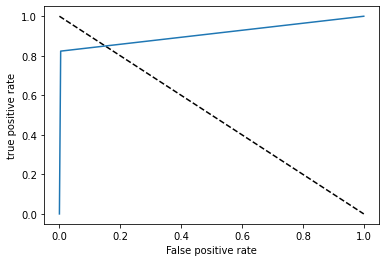

In [432]:
#plotting on graph
plt.plot([0,1],[1,0],"k--")
plt.plot(fpr,tpr,label="KNeighbourClassifier")
plt.xlabel("False positive rate")
plt.ylabel("true positive rate")
plt.show()

ModuleNotFoundError: No module named 'sklearn.external'